In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

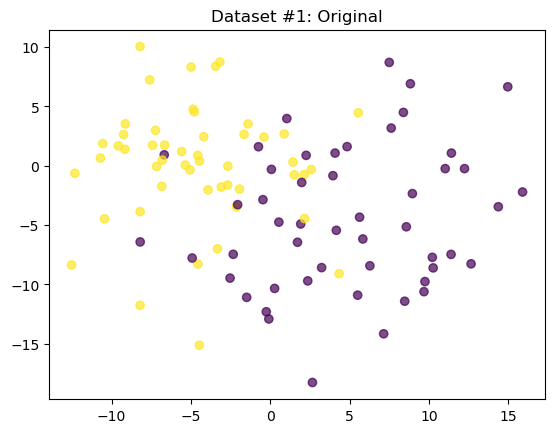

In [3]:
#Make dataset 1
X1, label1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=5, random_state=123)
plt.scatter(X1[:,0], X1[:,1], c=label1, alpha=0.7)
plt.title('Dataset #1: Original')
plt.show()

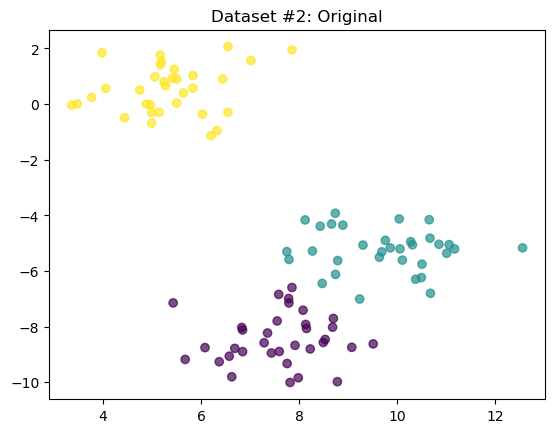

In [4]:
X2, label2 = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, random_state=321)
plt.scatter(X2[:,0], X2[:,1], c=label2, alpha=0.7)
plt.title('Dataset #2: Original')
plt.show()

Text(0.5, 1.0, 'Dataset #1: Kmeans')

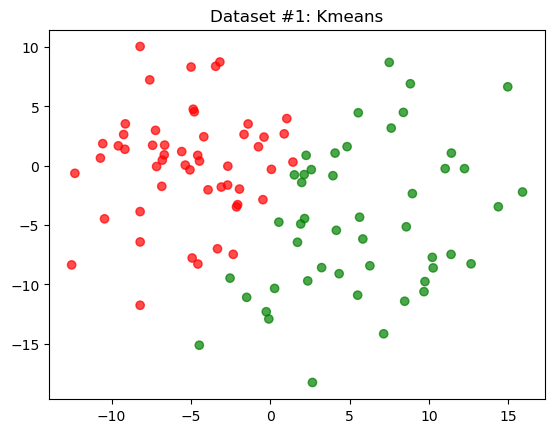

In [5]:
kmeans = KMeans(n_clusters=2, random_state=123, n_init='auto')
kmeans.fit(X1)
myColors = {0:'red', 1:'green', 2:'blue'}
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(kmeans.labels_).apply(lambda x : myColors[x]), alpha=0.7)
plt.title('Dataset #1: Kmeans')

Text(0.5, 1.0, 'Dataset #1: Kmeans 3 clusters')

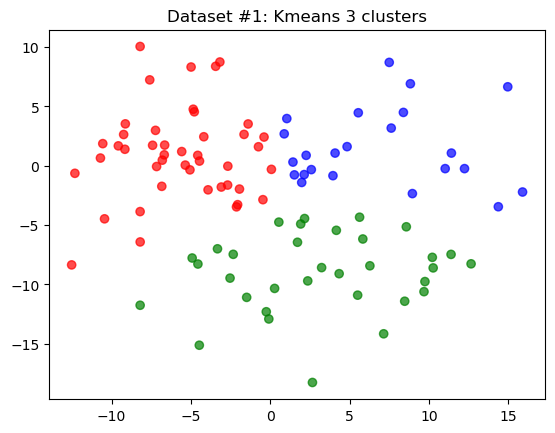

In [6]:
# Kmeans 3 clusters dataset 1
kmeans = KMeans(n_clusters=3, random_state=123, n_init='auto')
kmeans.fit(X1)
myColors={0:'red', 1:'green', 2:'blue'}
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #1: Kmeans 3 clusters')

Text(0.5, 1.0, 'Dataset #2: Kmeans 2 clusters')

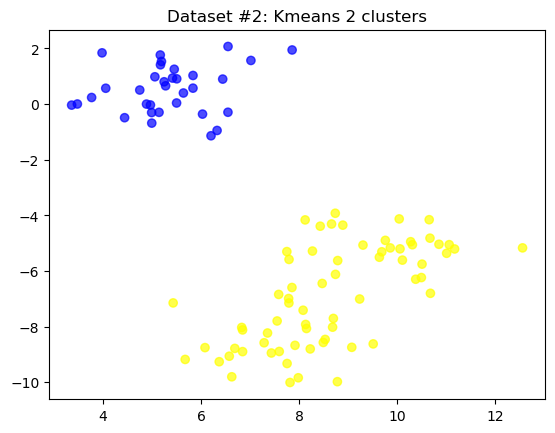

In [7]:
# Kmeans Dataset 2
kmeans = KMeans(n_clusters=2, random_state=123, n_init='auto')
kmeans.fit(X2)
myColors={0:'yellow', 1:'blue', 2:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Kmeans 2 clusters')

In [8]:
!pip install seaborn 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Kmeans with real data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])
Y = df['species']
header_X = X.columns
df.head()
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)
res = pd.Series(kmeans.labels_)
case0 = Y[res==0]
print(case0.value_counts())
case1 = Y[res==1]
print(case1.value_counts())
case2 = Y[res==2]
print(case2.value_counts())


species
virginica     36
versicolor     2
Name: count, dtype: int64
species
setosa    50
Name: count, dtype: int64
species
versicolor    48
virginica     14
Name: count, dtype: int64


In [4]:
learnedLabels = ['Virginica', 'Setosa', 'Versicolor']

In [5]:
np.round(pd.DataFrame(kmeans.cluster_centers_, columns=header_X, index=['Cluster 0','Cluster 1','Cluster 2']), 2)

,sepal_length,sepal_width,petal_length,petal_width
Cluster 0,6.85,3.07,5.74,2.07
Cluster 1,5.01,3.43,1.46,0.25
Cluster 2,5.90,2.75,4.39,1.43


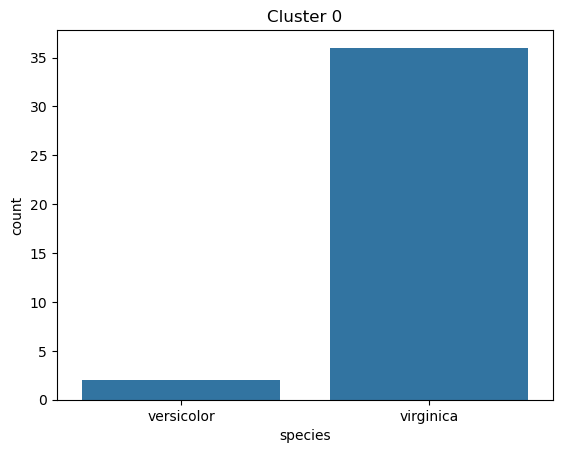

In [6]:
sns.countplot(x=case0).set_title("Cluster 0")
plt.show()

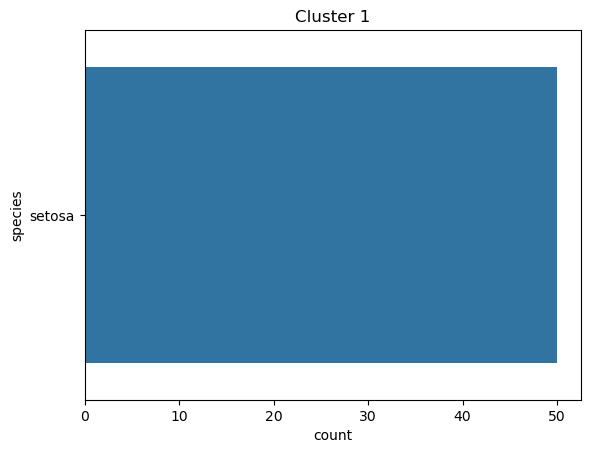

In [15]:
sns.countplot(case1).set_title('Cluster 1')
plt.show()

In [9]:
# Predict
X_test = {'sepal_length': [10] ,'sepal_width': [2.5] , 'petal_length': [4.8]  ,'petal_width': [2.3] }
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 0 with the most probable label 'Virginica'


In [ ]:
dbscan